# Early Stage Diabetes Detection - Case study

### About Data
This dataset contains the sign and symptpom data of newly diabetic or would be diabetic patient.This has been collected using direct questionnaires from the patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh and approved by a doctor.

#### Features of the dataset
The dataset consist of total **15** features and one target variable named class.

**1. Age:** Age in years ranging from (20years to 65 years)<br>
**2. Gender:** Male / Female<br>
**3. Polyuria:** Yes / No<br>
**4. Polydipsia:** Yes/ No<br>
**5. Sudden weight loss:** Yes/ No <br>
**6. Weakness:** Yes/ No<br>
**7. Polyphagia:** Yes/ No<br>
**8. Genital Thrush:** Yes/ No<br>
**9. Visual blurring:** Yes/ No<br>
**10. Itching:** Yes/ No<br>
**11. Irritability:** Yes/No<br>
**12. Delayed healing:** Yes/ No<br>
**13. Partial Paresis:** Yes/ No<br>
**14. Muscle stiffness:** yes/ No<br>
**15. Alopecia:** Yes/ No<br>
**16. Obesity:** Yes/ No<br>

**Class:** Positive / Negative

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

In [2]:
df = pd.read_csv('diabetes_data_upload.csv')

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,Itching,Irritability,delayed healing,partial paresis,Alopecia,class
0,40,Male,No,Yes,No,Yes,No,Yes,No,Yes,Positive
1,58,Male,No,No,No,No,No,No,Yes,Yes,Positive
2,41,Male,Yes,No,No,Yes,No,Yes,No,Yes,Positive
3,45,Male,No,No,Yes,Yes,No,Yes,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


### Checking Missing Values

In [4]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
Alopecia              0
class                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   Itching             520 non-null    object
 6   Irritability        520 non-null    object
 7   delayed healing     520 non-null    object
 8   partial paresis     520 non-null    object
 9   Alopecia            520 non-null    object
 10  class               520 non-null    object
dtypes: int64(1), object(10)
memory usage: 44.8+ KB


### Distribution of Target Variable

<AxesSubplot:xlabel='class', ylabel='count'>

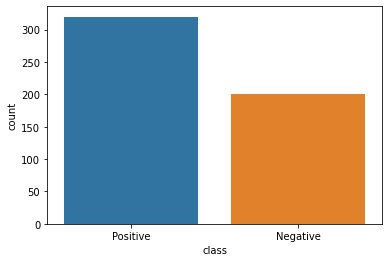

In [6]:
import seaborn as sns

sns.countplot(df['class'],data=df)

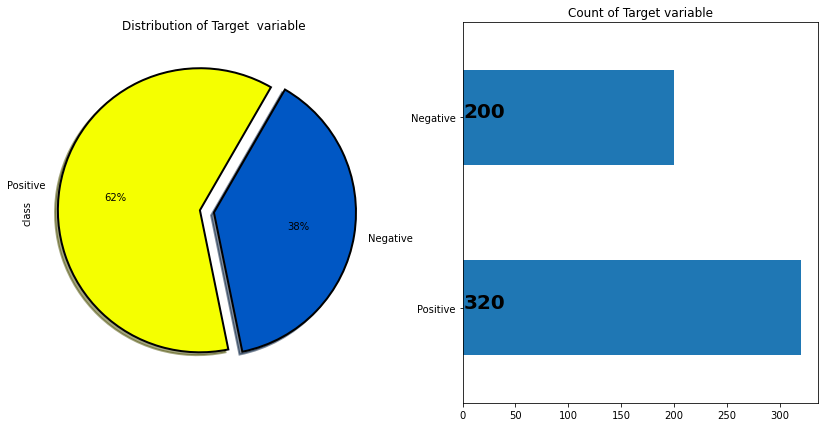

In [7]:
# plotting to create pie chart and bar plot as subplots
plt.figure(figsize=(14,7))
plt.subplot(121)
df["class"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["Positive","Negative"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Target  variable")

plt.subplot(122)
ax = df["class"].value_counts().plot(kind="barh")

for i,j in enumerate(df["class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Target variable")
plt.show()

### Distribution of Gender

<AxesSubplot:xlabel='Gender', ylabel='count'>

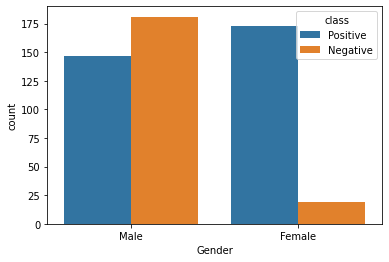

In [8]:
import seaborn as sns

sns.countplot(df['Gender'],hue=df['class'], data=df)

In [9]:
 plot_criteria= ['Gender', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


### Distribution of Polyuria

Polyuria is defined as the frequent passage of large volumes of urine – more than 3 litres a day compared to the normal daily urine output in adults of about 1 to 2 litres.
#### Causes:
The most common cause of polyuria in both adults and children is ***uncontrolled diabetes mellitus***, which causes **osmotic diuresis**, when glucose levels are so high that glucose is excreted in the urine. Water follows the glucose concentration passively, leading to abnormally high urine output. 

In the absence of diabetes mellitus, the most common causes are decreased secretion of aldosterone due to adrenal cortical tumor, primary **polydipsia** (excessive fluid drinking),


In [10]:
 plot_criteria= ['Polyuria', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


### Distribution of Polydipsia

Polydipsia is the term given to **excessive thirst** and is one of the initial symptoms of diabetes. It is also usually accompanied by temporary or prolonged dryness of the mouth.

However, if you feel thirsty all the time or your thirst is stronger than usual and continues even after you drink, it can be a sign that not all is well inside your body.

Excessive thirst can be caused by high blood sugar (hyperglycemia), and is also one of the ‘Big 3’ signs of diabetes mellitus i.e., 

**1. Polyuria**<br>
**2. Polydipsia** <br>
**3. Polyphagia** <br>

Generally, increased thirst (polydipsia) and an increased need to urinate (polyuria) will often come as a pair.

In [11]:
plot_criteria= ['Polydipsia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polydipsia,,
No,96.000000,29.690000
Yes,4.000000,70.310000


### Distribution of sudden weight loss

In [12]:
plot_criteria= ['sudden weight loss', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
sudden weight loss,,
No,85.500000,41.250000
Yes,14.500000,58.750000


### Distribution of weakness

In [13]:
#plot_criteria= ['weakness', 'class']
#cm = sns.light_palette("red", as_cmap=True)
#(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

### Distribution of Polyphagia

Polyphagia, also known as hyperphagia, is the medical term for excessive or extreme hunger. 

It's different than having an increased appetite after exercise or other physical activity. 

While your hunger level will return to normal after eating in those cases, polyphagia won't go away if you eat more food.

In [14]:
#plot_criteria= ['Polyphagia', 'class']
#cm = sns.light_palette("red", as_cmap=True)
#(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

### Distribution of genital thrush

Thrush (or candidiasis) is a common condition caused by a type of yeast called Candida. It mainly affects the vagina, though may affect the penis too, and can be irritating and painful.

Many types of yeast and bacteria naturally live in the vagina and rarely cause problems. Candida is a yeast-like fungus that lives in warm, moist places such as the mouth, bowel, vagina and the foreskin of the penis. Thrush is caused when there is an overgrowth of Candida.

In [15]:
'''plot_criteria= ['Genital thrush', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)'''

'plot_criteria= [\'Genital thrush\', \'class\']\ncm = sns.light_palette("red", as_cmap=True)\n(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize=\'columns\') * 100,2)).style.background_gradient(cmap = cm)'

### Distribution of Visual Blurring

In [16]:
"""plot_criteria= ['visual blurring', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)"""

'plot_criteria= [\'visual blurring\', \'class\']\ncm = sns.light_palette("red", as_cmap=True)\n(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize=\'columns\') * 100,2)).style.background_gradient(cmap = cm)'

### Itching

In [17]:
plot_criteria= ['Itching', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Itching,,
No,50.500000,51.880000
Yes,49.500000,48.120000


### Irritability

In [18]:
plot_criteria= ['Irritability', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Irritability,,
No,92.000000,65.620000
Yes,8.000000,34.380000


### Delayed Healing

In [19]:
plot_criteria= ['delayed healing', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
delayed healing,,
No,57.000000,52.190000
Yes,43.000000,47.810000


### Partial Paresis

Paresis involves the weakening of a muscle or group of muscles. It may also be referred to as partial or mild paralysis. Unlike paralysis, people with paresis can still move their muscles. These movements are just weaker than normal.

In [20]:
plot_criteria= ['partial paresis', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
partial paresis,,
No,84.000000,40.000000
Yes,16.000000,60.000000


### Muscle Stiffness

In [21]:
"""plot_criteria= ['muscle stiffness', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)"""

'plot_criteria= [\'muscle stiffness\', \'class\']\ncm = sns.light_palette("red", as_cmap=True)\n(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize=\'columns\') * 100,2)).style.background_gradient(cmap = cm)'

### Alopecia

Sudden hair loss that starts with one or more circular bald patches that may overlap.
Alopecia areata occurs when the immune system attacks hair follicles and may be brought on by severe stress.
The main symptom is hair loss.

In [22]:
plot_criteria= ['Alopecia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Alopecia,,
No,49.500000,75.620000
Yes,50.500000,24.380000


### Obesity

In [23]:
"""plot_criteria= ['Obesity', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)"""

'plot_criteria= [\'Obesity\', \'class\']\ncm = sns.light_palette("red", as_cmap=True)\n(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize=\'columns\') * 100,2)).style.background_gradient(cmap = cm)'

### Data pre-processing

In [24]:
df['class'] = df['class'].apply(lambda x: 0 if x=='Negative' else 1)

In [25]:
X= df.drop(['class'],axis=1)
y=df['class']

In [26]:
objList = X.select_dtypes(include = "object").columns
print (objList)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis', 'Alopecia'],
      dtype='object')


In [27]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    X[feat] = le.fit_transform(X[feat].astype(str))

print (X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int32
 2   Polyuria            520 non-null    int32
 3   Polydipsia          520 non-null    int32
 4   sudden weight loss  520 non-null    int32
 5   Itching             520 non-null    int32
 6   Irritability        520 non-null    int32
 7   delayed healing     520 non-null    int32
 8   partial paresis     520 non-null    int32
 9   Alopecia            520 non-null    int32
dtypes: int32(9), int64(1)
memory usage: 22.5 KB
None


In [28]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,Itching,Irritability,delayed healing,partial paresis,Alopecia
0,40,1,0,1,0,1,0,1,0,1
1,58,1,0,0,0,0,0,0,1,1
2,41,1,1,0,0,1,0,1,0,1
3,45,1,0,0,1,1,0,1,0,0
4,60,1,1,1,1,1,1,1,1,1


### Correlation

In [29]:
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
Alopecia             -0.267512
dtype: float64

<AxesSubplot:title={'center':'Correlation with Diabetes'}>

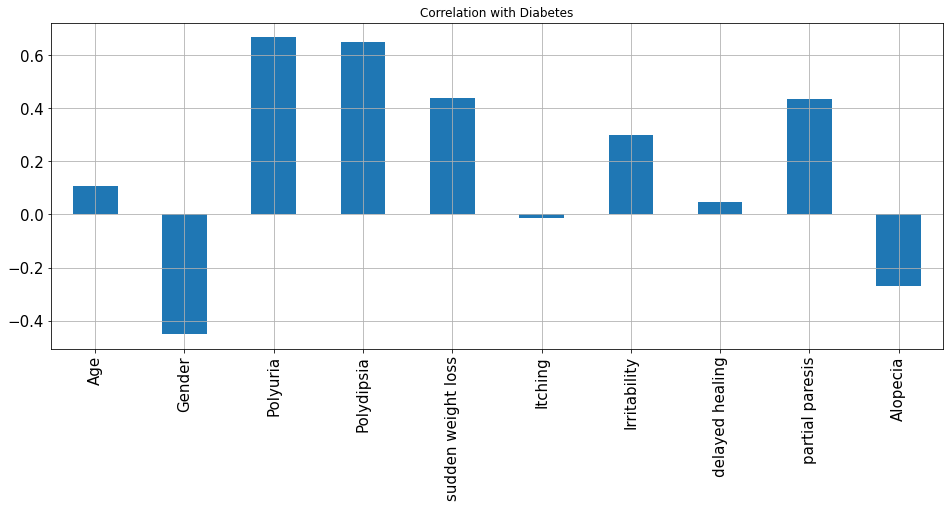

In [30]:
#Correlation with Response Variable class

X.corrwith(y).plot.bar(
        figsize = (16, 6), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)


### Train Test Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 1234)

In [32]:
## checking distribution of traget variable in train test split
print('Distribution of traget variable in training set')
print(y_train.value_counts())

print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1    256
0    160
Name: class, dtype: int64
Distribution of traget variable in test set
1    64
0    40
Name: class, dtype: int64


### Data Normalization 

In [33]:
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

In [34]:
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,Itching,Irritability,delayed healing,partial paresis,Alopecia
246,0.405405,1,0,0,0,1,0,1,0,1
274,0.554054,1,0,0,0,0,0,0,0,0
424,0.364865,1,1,1,1,0,0,0,0,0
316,0.527027,0,0,0,0,1,0,1,1,1
159,0.297297,0,1,1,1,1,1,1,1,0


### Model Building

### 1. Logistic Regression (Base model)

In [35]:
logi = LogisticRegression(random_state = 0, penalty = 'l2')
logi.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [36]:
from sklearn import model_selection

kfold = model_selection.KFold(n_splits=10, random_state=None)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator = logi, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_logi.mean()

0.8988385598141695

In [37]:
y_predict_logi = logi.predict(X_test)
acc= accuracy_score(y_test, y_predict_logi)
roc=roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc, acc_logi.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.961538,0.898839,0.983871,0.953125,0.968254,0.964063


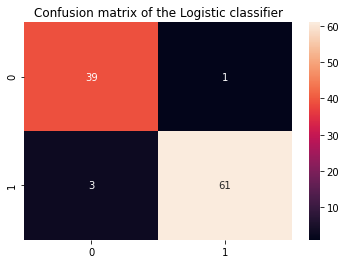

In [38]:
cm_logi = confusion_matrix(y_test, y_predict_logi)
plt.title('Confusion matrix of the Logistic classifier')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

In [39]:
TP = cm_logi[1,1] # true positive 
TN = cm_logi[0,0] # true negatives
FP = cm_logi[0,1] # false positives
FN = cm_logi[1,0] # false negatives
# Let us calculate specificity
TN / float(TN+FP)

0.975

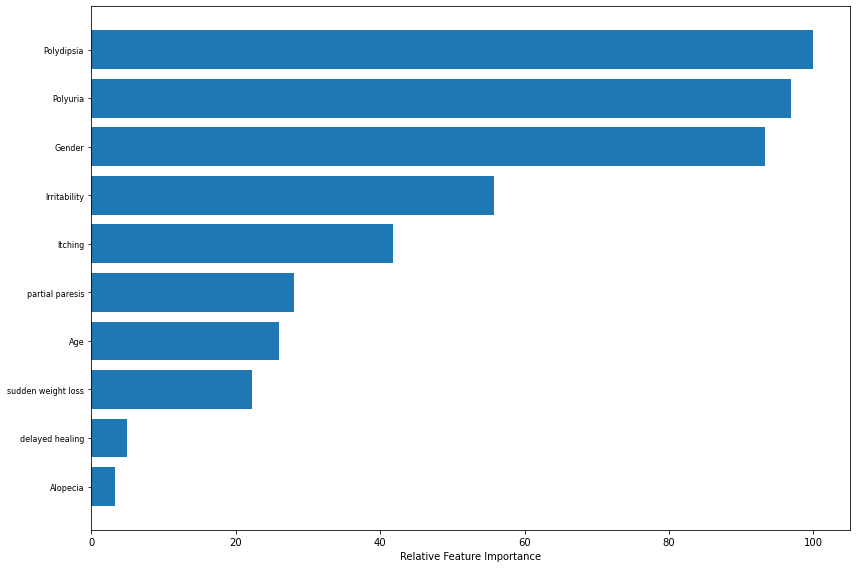

In [40]:
feature_importance = abs(logi.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .3

featfig = plt.figure(figsize=(12,8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()

## 2. Random forest (Before Tuning)

In [41]:
rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
kfold = model_selection.KFold(n_splits=10, random_state=None)
scoring = 'accuracy'

acc_rf = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_rf.mean()

0.9614401858304298

In [43]:
y_predict_r = rf.predict(X_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest (Untuned)',acc, acc_rf.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.961538,0.898839,0.983871,0.953125,0.968254,0.964063
1,Random Forest (Untuned),0.980769,0.961440,1.000000,0.968750,0.984127,0.984375


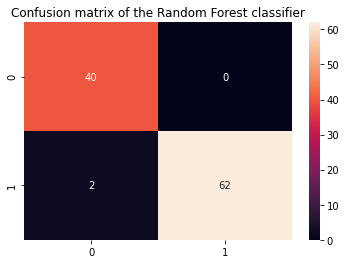

In [44]:
cm_rf = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest classifier')
sns.heatmap(cm_rf,annot=True,fmt="d")
plt.show()

In [45]:
TP = cm_rf[1,1] # true positive 
TN = cm_rf[0,0] # true negatives
FP = cm_rf[0,1] # false positives
FN = cm_rf[1,0] # false negatives
# Let us calculate specificity
TN / float(TN+FP)

1.0

<AxesSubplot:>

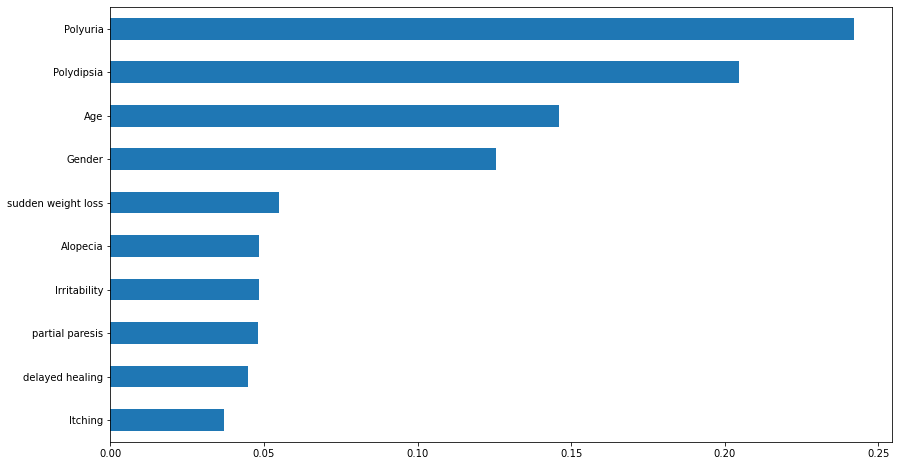

In [46]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(14, 8))

### Feature Selection - Top 10 Features

In [47]:
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'Alopecia'],
      dtype='object')

In [48]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,Itching,Irritability,delayed healing,partial paresis,Alopecia
0,40,1,0,1,0,1,0,1,0,1
1,58,1,0,0,0,0,0,0,1,1
2,41,1,1,0,0,1,0,1,0,1
3,45,1,0,0,1,1,0,1,0,0
4,60,1,1,1,1,1,1,1,1,1


#### filtering unwanted features

In [49]:
X_fs = X[['Age', 'Gender','Polyuria', 'Polydipsia','sudden weight loss','Itching','Irritability','delayed healing', 'partial paresis','Alopecia']]

### Train Test Split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_fs, y, test_size = 0.2,stratify=y, random_state = 1234)

### Data normalization

In [51]:
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

### Model building

#### Logistic Regression - Post Feature Selection

In [52]:
logi = LogisticRegression(random_state = 0, penalty = 'l2')
logi.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Cross validation

In [53]:
kfold = model_selection.KFold(n_splits=10, random_state=None)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator = logi, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_logi.mean()

0.8988385598141695

In [54]:
y_predict_logi = logi.predict(X_test)
acc= accuracy_score(y_test, y_predict_logi)
roc=roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

model_results = pd.DataFrame([['Logistic Regression-Post FS',acc, acc_logi.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.961538,0.898839,0.983871,0.953125,0.968254,0.964063
1,Random Forest (Untuned),0.980769,0.961440,1.000000,0.968750,0.984127,0.984375
2,Logistic Regression-Post FS,0.961538,0.898839,0.983871,0.953125,0.968254,0.964063


### Random Forest - Post Feature selection

In [55]:
rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

### Cross Validation

In [56]:
kfold = model_selection.KFold(n_splits=10, random_state=None)
scoring = 'accuracy'

acc_rf = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_rf.mean()

0.9662020905923345

### Model Evaluation

In [57]:
y_predict_r = rf.predict(X_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest- Post FS',acc, acc_rf.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.961538,0.898839,0.983871,0.953125,0.968254,0.964063
1,Random Forest (Untuned),0.980769,0.961440,1.000000,0.968750,0.984127,0.984375
2,Logistic Regression-Post FS,0.961538,0.898839,0.983871,0.953125,0.968254,0.964063
3,Random Forest- Post FS,0.980769,0.966202,1.000000,0.968750,0.984127,0.984375


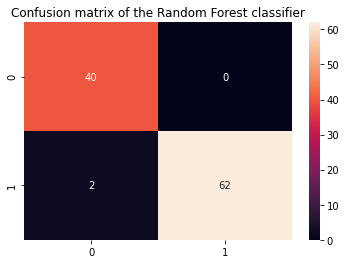

In [58]:
cm_rf = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest classifier')
sns.heatmap(cm_rf,annot=True,fmt="d")
plt.show()

In [59]:
TP = cm_rf[1,1] # true positive 
TN = cm_rf[0,0] # true negatives
FP = cm_rf[0,1] # false positives
FN = cm_rf[1,0] # false negatives
# Let us calculate specificity
TN / float(TN+FP)

1.0

<AxesSubplot:>

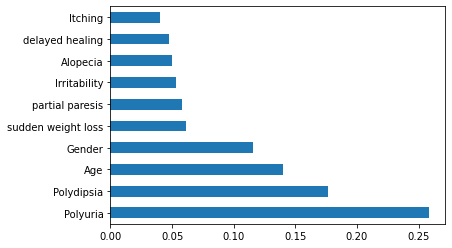

In [60]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

### Plotting ROC 

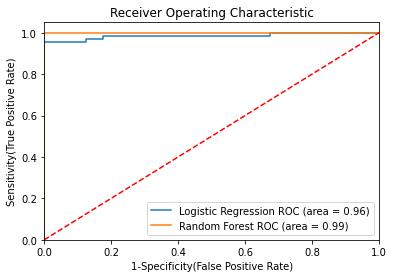

In [61]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(random_state = 0, penalty = 'l2'),
},

    {
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators = 100,criterion='gini', random_state = 47),
},
    
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Saving the trained model

In [62]:
import pickle

In [63]:
filename='diabetes.sav'
pickle.dump(rf,open(filename,'wb'))

In [64]:
#loading the saved model
loaded_model=pickle.load(open('diabetes.sav','rb'))